In [ ]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [ ]:
def what_is_installed():
    from pycaret import show_versions
    show_versions()

try:
    what_is_installed()
except ModuleNotFoundError:
    !pip install pycaret
    what_is_installed()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [ ]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
y = get_data('airline', verbose=False)

In [ ]:
fh = 12
fold = 3

In [ ]:
fig_kwargs = {
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [ ]:
eda = TSForecastingExperiment()
eda.setup(data=y, fh=fh, fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,897
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


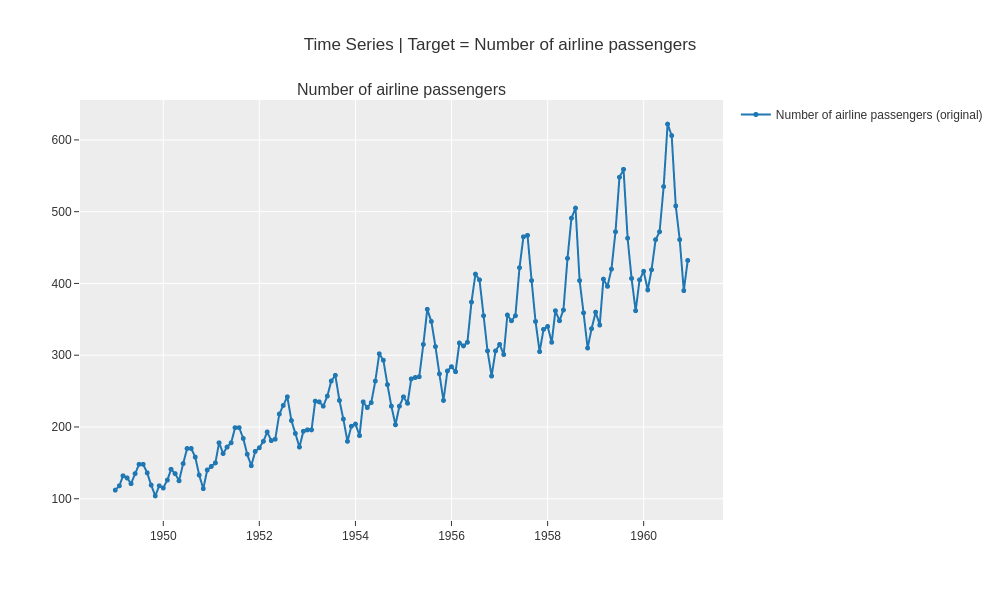

In [ ]:
eda.plot_model()

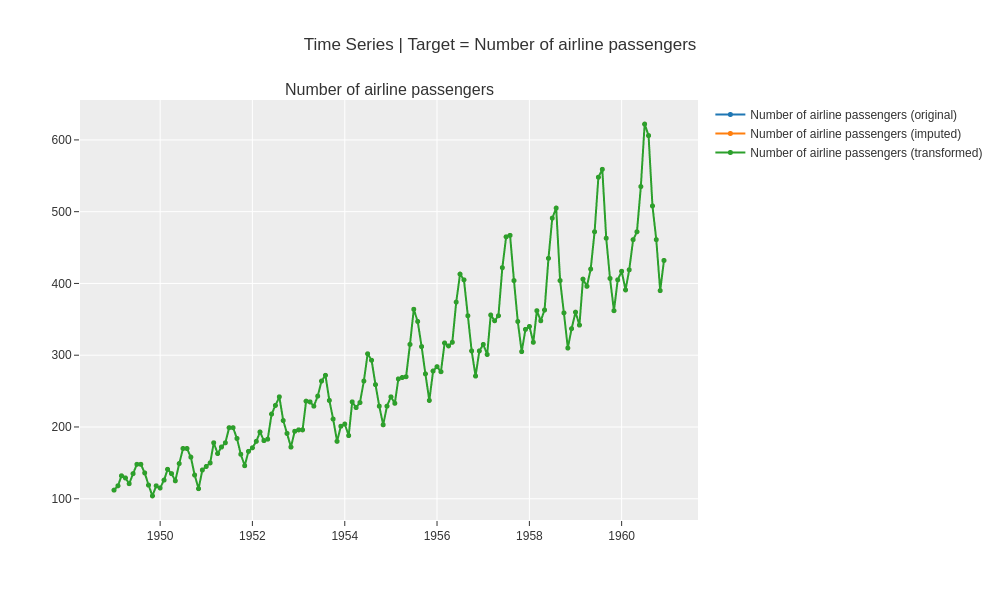

In [ ]:
eda.plot_model(data_kwargs={"plot_data_type": ["original", "imputed", "transformed"]})

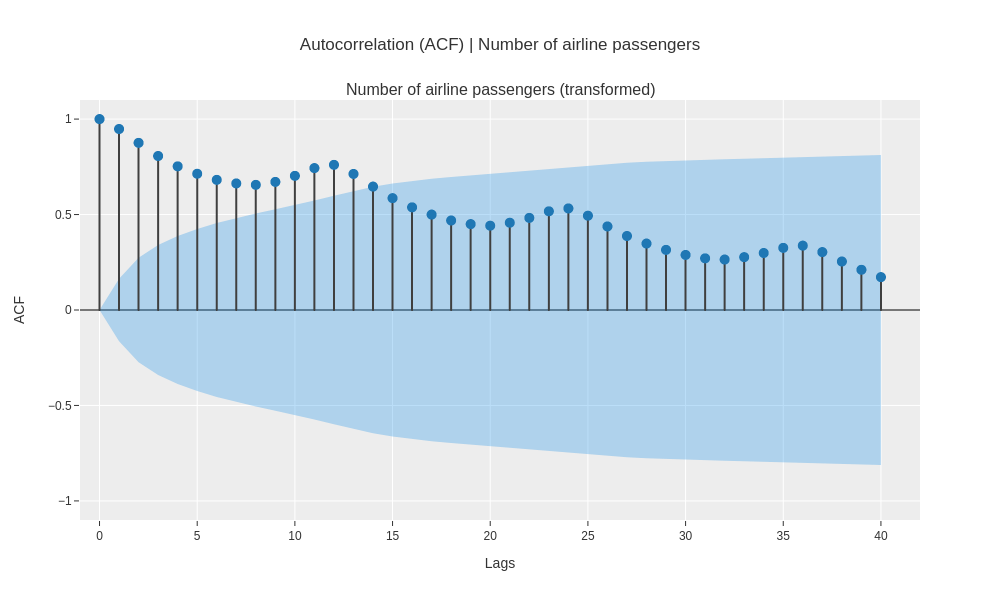

In [ ]:
eda.plot_model(plot="acf")

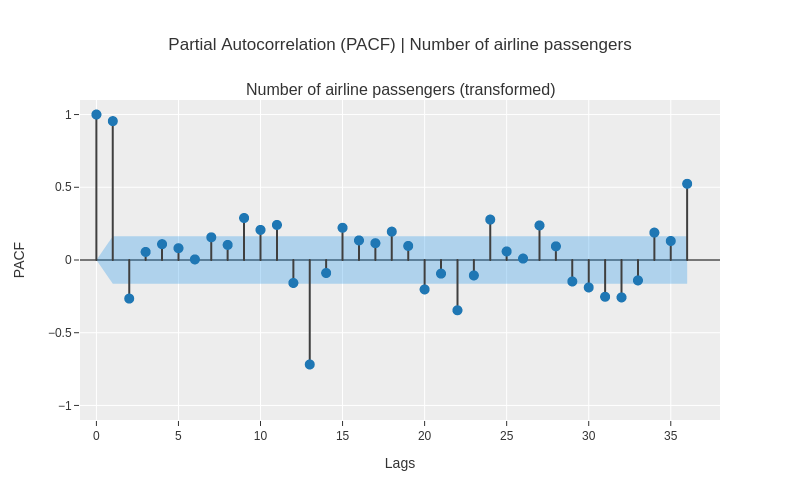

In [ ]:
eda.plot_model(plot="pacf", data_kwargs={'nlags':36}, fig_kwargs={'height': 500, "width": 800})

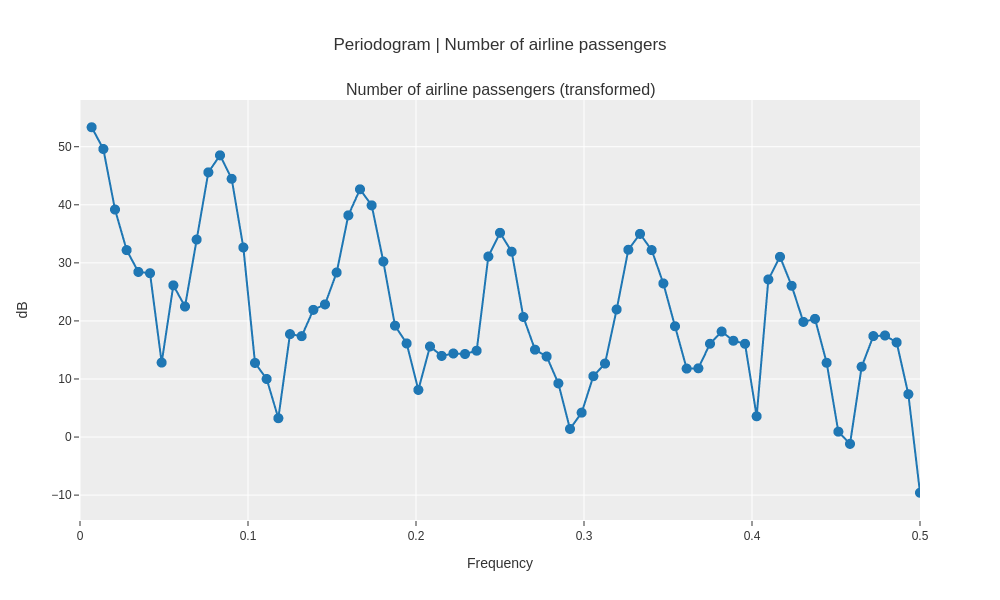

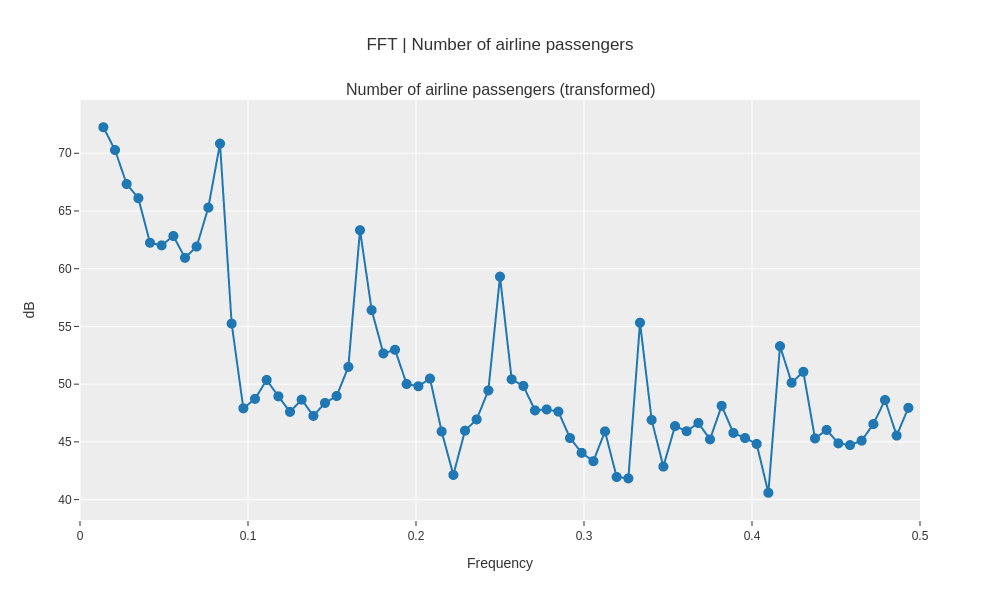

In [ ]:
eda.plot_model(plot="periodogram")
eda.plot_model(plot="fft")

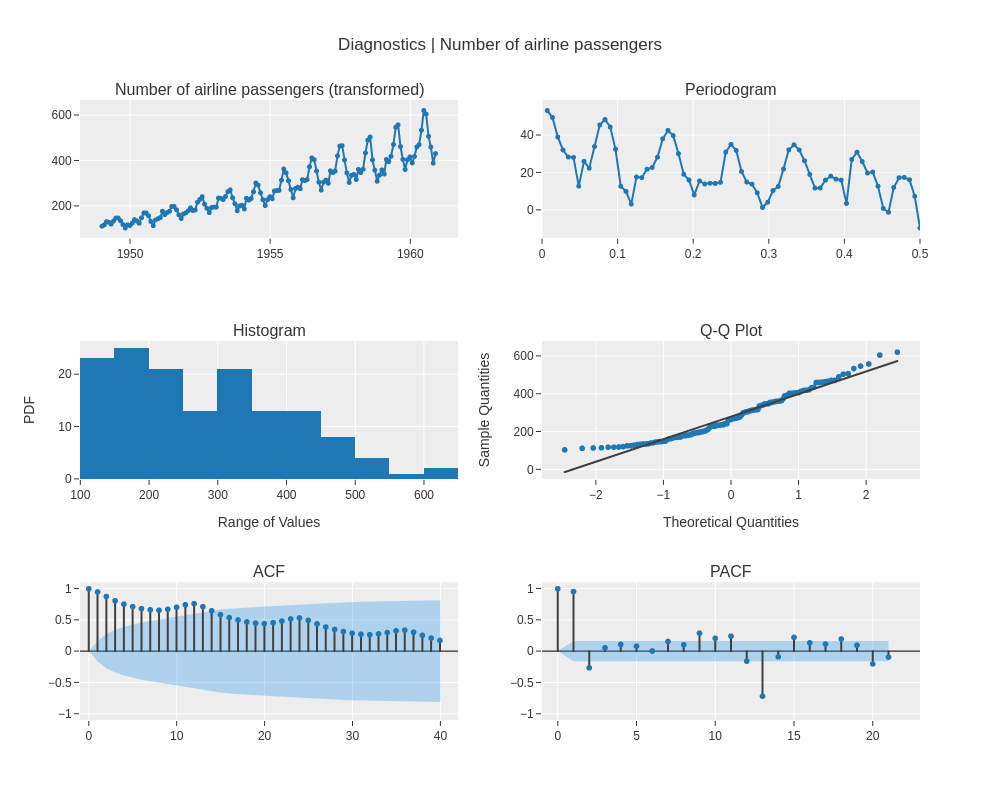

In [ ]:
eda.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

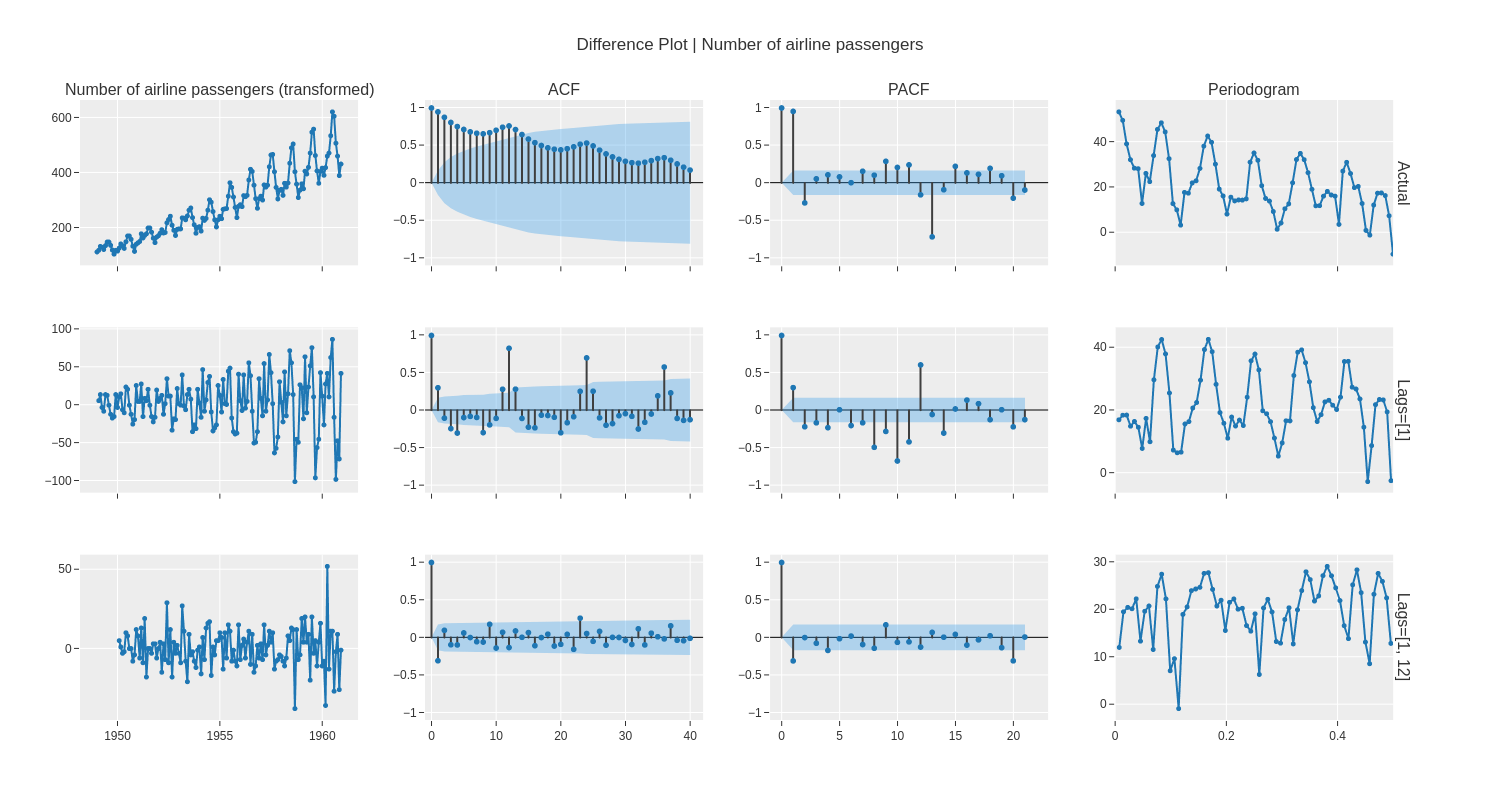

In [ ]:
eda.plot_model(
    plot="diff",
    data_kwargs={"lags_list": [[1], [1, 12]], "acf": True, "pacf": True, "periodogram": True},
    fig_kwargs={"height": 800, "width": 1500}
)

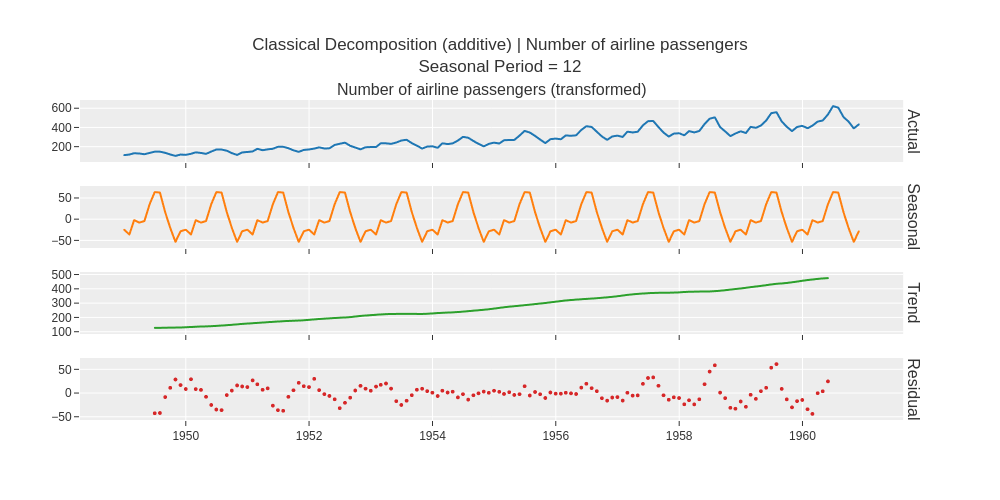

In [ ]:
eda.plot_model(plot="decomp", fig_kwargs={"height": 500})

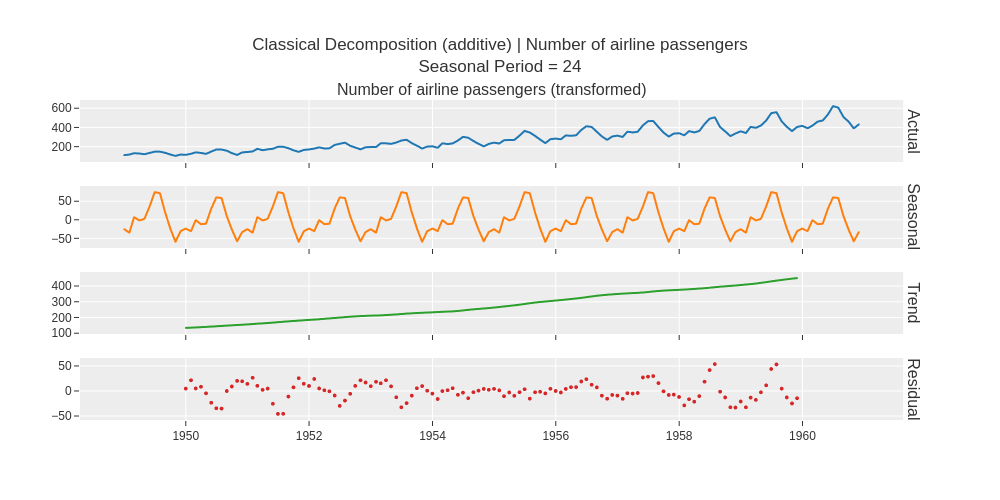

In [ ]:
eda.plot_model(plot="decomp", data_kwargs={'seasonal_period': 24}, fig_kwargs={"height": 500})

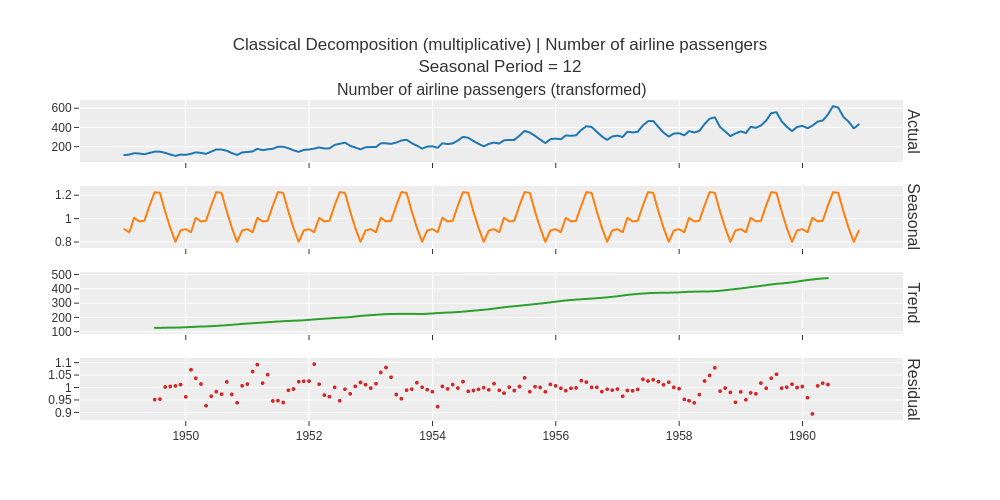

In [ ]:
eda.plot_model(plot="decomp", data_kwargs={'type': 'multiplicative'}, fig_kwargs={"height": 500})

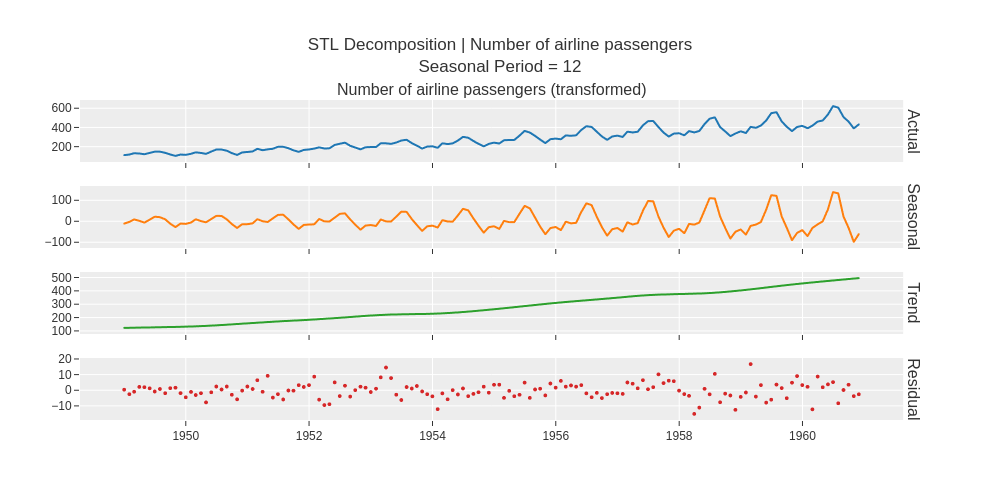

In [ ]:
eda.plot_model(plot="decomp_stl", fig_kwargs={"height": 500})

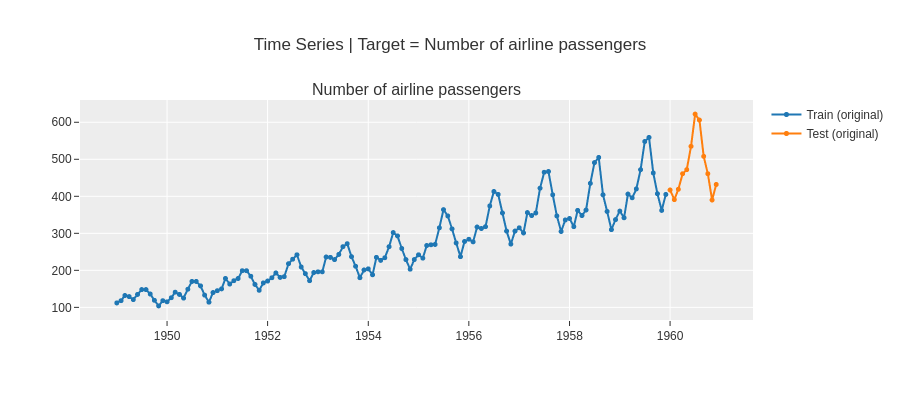

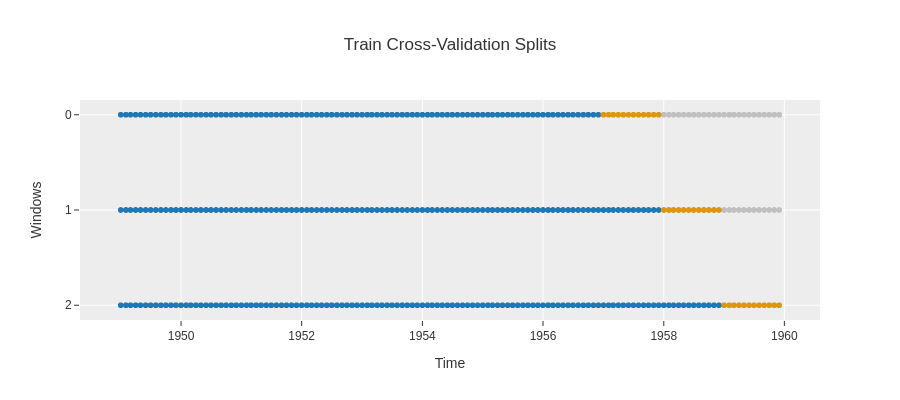

In [ ]:
eda.plot_model(plot="train_test_split", fig_kwargs={"height": 400, "width": 900})

eda.plot_model(plot="cv", fig_kwargs={"height": 400, "width": 900})

In [ ]:
eda.check_stats(test="summary")

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.000000
1,Summary,Statistics,Transformed,# Missing Values,,0.000000
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.500000
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.583160
8,Summary,Statistics,Transformed,# Distinct Values,,118.000000


In [ ]:
eda.check_stats(test='stationarity')

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,ADF,Transformed,Stationarity,{'alpha': 0.05},False
1,Stationarity,ADF,Transformed,p-value,{'alpha': 0.05},0.99188
2,Stationarity,ADF,Transformed,Test Statistic,{'alpha': 0.05},0.815369
3,Stationarity,ADF,Transformed,Critical Value 1%,{'alpha': 0.05},-3.481682
4,Stationarity,ADF,Transformed,Critical Value 5%,{'alpha': 0.05},-2.884042
5,Stationarity,ADF,Transformed,Critical Value 10%,{'alpha': 0.05},-2.57877
6,Stationarity,KPSS,Transformed,Trend Stationarity,{'alpha': 0.05},True
7,Stationarity,KPSS,Transformed,p-value,{'alpha': 0.05},0.1
8,Stationarity,KPSS,Transformed,Test Statistic,{'alpha': 0.05},0.09615
9,Stationarity,KPSS,Transformed,Critical Value 10%,{'alpha': 0.05},0.119


In [ ]:
eda.check_stats(test='white_noise')

,Test,Test Name,Data,Property,Setting,Value
0,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817
1,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 48}",1933.155822
2,White Noise,Ljung-Box,Transformed,p-value,"{'alpha': 0.05, 'K': 24}",0.000000
3,White Noise,Ljung-Box,Transformed,p-value,"{'alpha': 0.05, 'K': 48}",0.000000
4,White Noise,Ljung-Box,Transformed,White Noise,"{'alpha': 0.05, 'K': 24}",0.000000
5,White Noise,Ljung-Box,Transformed,White Noise,"{'alpha': 0.05, 'K': 48}",0.000000


In [ ]:
eda.check_stats(test='kpss', alpha = 0.2)

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,KPSS,Transformed,Trend Stationarity,{'alpha': 0.2},False
1,Stationarity,KPSS,Transformed,p-value,{'alpha': 0.2},0.1
2,Stationarity,KPSS,Transformed,Test Statistic,{'alpha': 0.2},0.09615
3,Stationarity,KPSS,Transformed,Critical Value 10%,{'alpha': 0.2},0.119
4,Stationarity,KPSS,Transformed,Critical Value 5%,{'alpha': 0.2},0.146
5,Stationarity,KPSS,Transformed,Critical Value 2.5%,{'alpha': 0.2},0.176
6,Stationarity,KPSS,Transformed,Critical Value 1%,{'alpha': 0.2},0.216


In [ ]:
eda.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


In [ ]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [ ]:
def what_is_installed():
    from pycaret import show_versions
    show_versions()

try:
    what_is_installed()
except ModuleNotFoundError:
    !pip install pycaret
    what_is_installed()


System:
    python: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.85+-x86_64-with-glibc2.35

PyCaret required dependencies:
                 pip: 24.1.2
          setuptools: 71.0.4
             pycaret: 3.3.2
             IPython: 7.34.0
          ipywidgets: 7.7.1
                tqdm: 4.66.5
               numpy: 1.26.4
              pandas: 2.1.4
              jinja2: 3.1.4
               scipy: 1.11.4
              joblib: 1.3.2
             sklearn: 1.4.2
                pyod: 2.0.2
            imblearn: 0.12.3
   category_encoders: 2.6.3
            lightgbm: 4.5.0
               numba: 0.60.0
            requests: 2.32.3
          matplotlib: 3.7.1
          scikitplot: 0.3.7
         yellowbrick: 1.5
              plotly: 5.15.0
    plotly-resampler: Not installed
             kaleido: 0.2.1
           schemdraw: 0.15
         statsmodels: 0.14.3
              sktime: 0.26.0
               tbats: 1.1.3
            pmdari

In [ ]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
y = get_data('airline', verbose=False)

In [ ]:
fh = 12
fold = 3

In [ ]:
fig_kwargs = {
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [ ]:
exp = TSForecastingExperiment()
exp.setup(data=y, fh=fh, fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,1437
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [ ]:
exp = TSForecastingExperiment()
exp.setup(data=y, fh=fh, fold=fold, fig_kwargs=fig_kwargs, session_id=42)

,Description,Value
0,session_id,42
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model = exp.create_model("arima", order=(1,1,0), seasonal_order=(0,1,0,12))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3535,0.4103,10.3216,13.4315,0.0255,0.0260,0.9413
1,1957-12,0.6844,0.6853,20.9235,23.2653,0.0581,0.0560,0.8582
2,1958-12,1.5988,1.4673,45.6850,47.6955,0.1066,0.1132,0.4911
Mean,NaT,0.8789,0.8543,25.6434,28.1308,0.0634,0.0651,0.7635
SD,NaT,0.5267,0.4477,14.8178,14.4051,0.0333,0.0362,0.1956


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
y_predict = exp.predict_model(model)
y_predict

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.6999,0.7757,21.3121,26.7998,0.0480,0.0462,0.8703


,y_pred
1960-01,424.7154
1960-02,408.1599
1960-03,472.4447
1960-04,463.0139
1960-05,487.5134
1960-06,540.0299
1960-07,616.5423
1960-08,628.0557
1960-09,532.5688
1960-10,477.0820


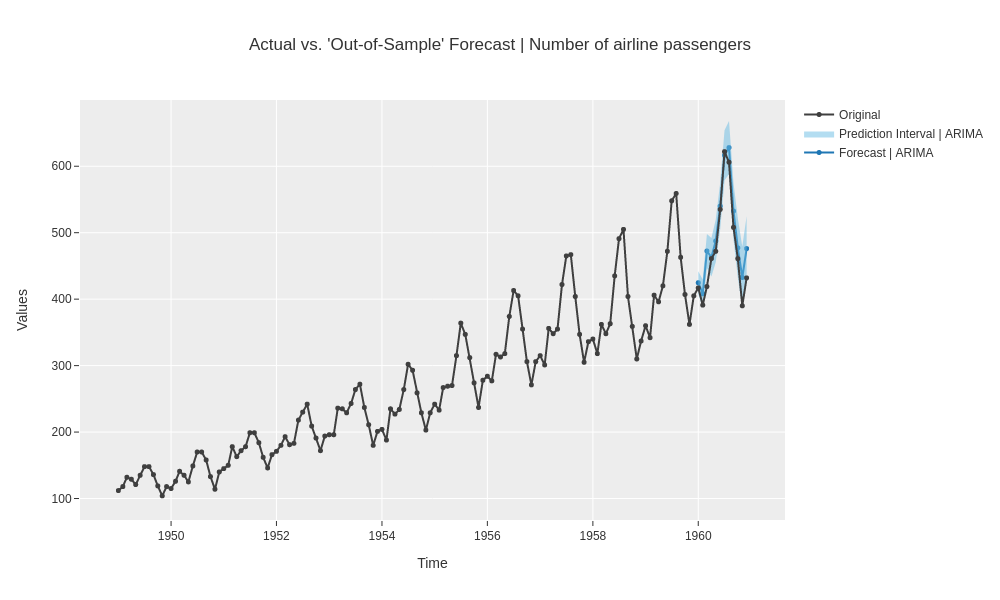

In [ ]:
exp.plot_model(estimator=model)

In [ ]:
exp.check_stats(model)

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Residual,Length,,131.0
1,Summary,Statistics,Residual,# Missing Values,,0.0
2,Summary,Statistics,Residual,Mean,,-0.445207
3,Summary,Statistics,Residual,Median,,-0.9606
4,Summary,Statistics,Residual,Standard Deviation,,11.759243
5,Summary,Statistics,Residual,Variance,,138.27979
6,Summary,Statistics,Residual,Kurtosis,,4.244741
7,Summary,Statistics,Residual,Skewness,,-0.938657
8,Summary,Statistics,Residual,# Distinct Values,,127.0
9,White Noise,Ljung-Box,Residual,Test Statictic,"{'alpha': 0.05, 'K': 24}",21.29991


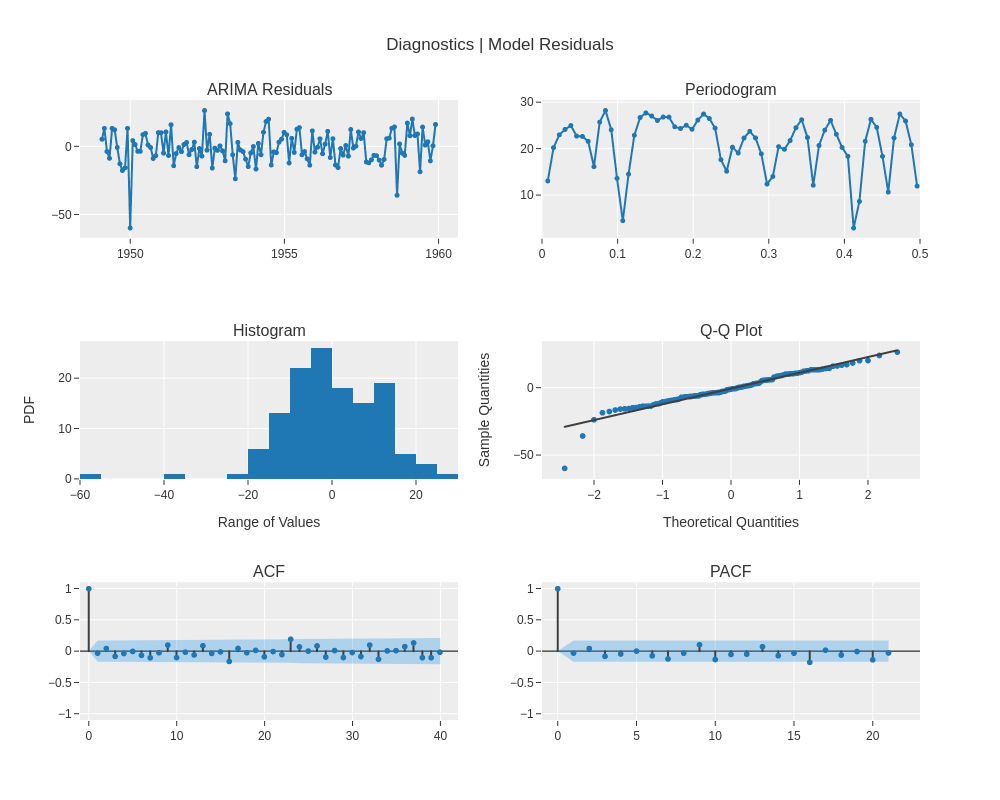

In [ ]:
exp.plot_model(model, plot='diagnostics', fig_kwargs={"height": 800, "width": 1000})

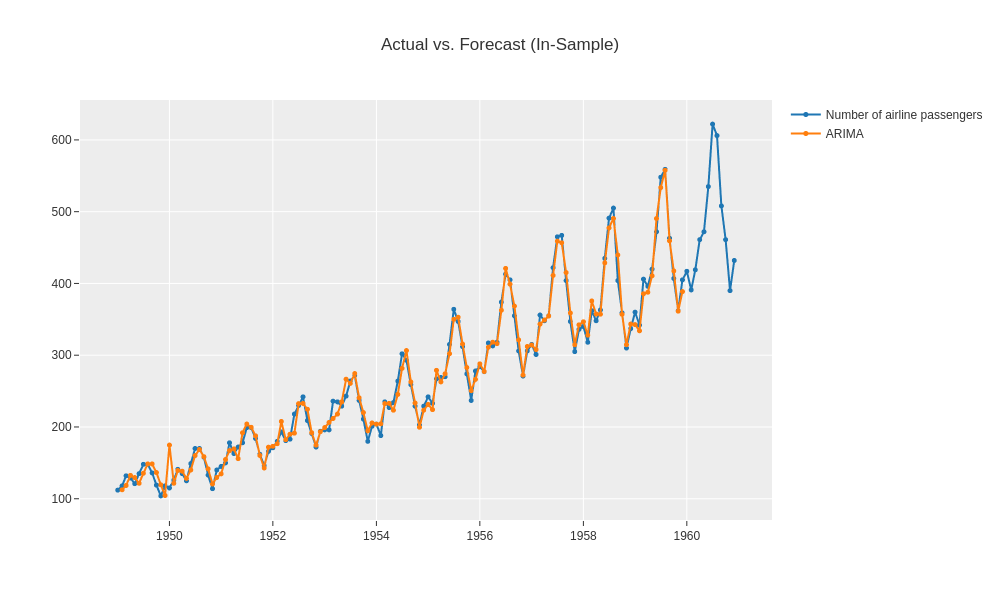

In [ ]:
exp.plot_model(model, plot='insample')

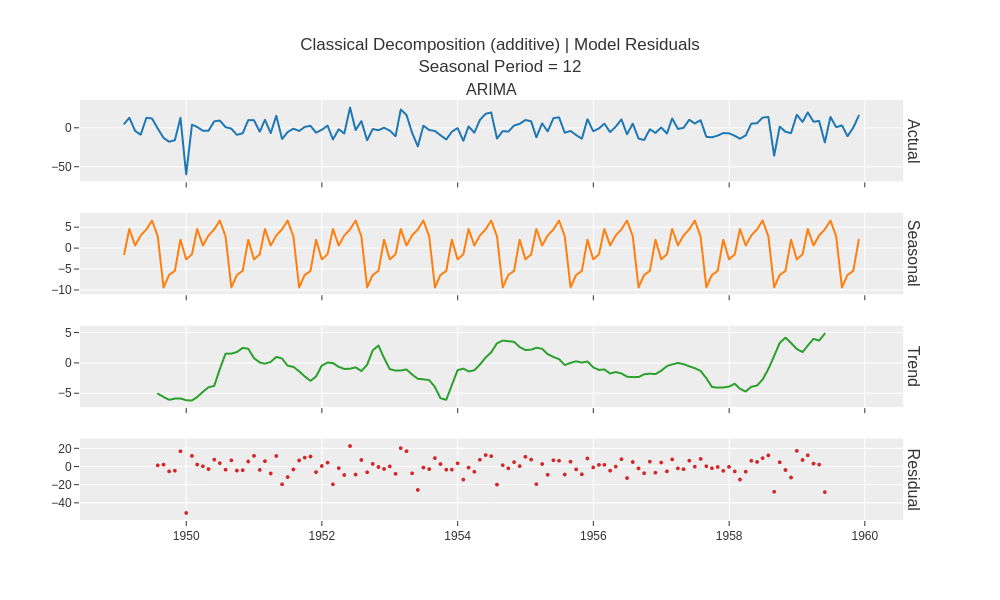

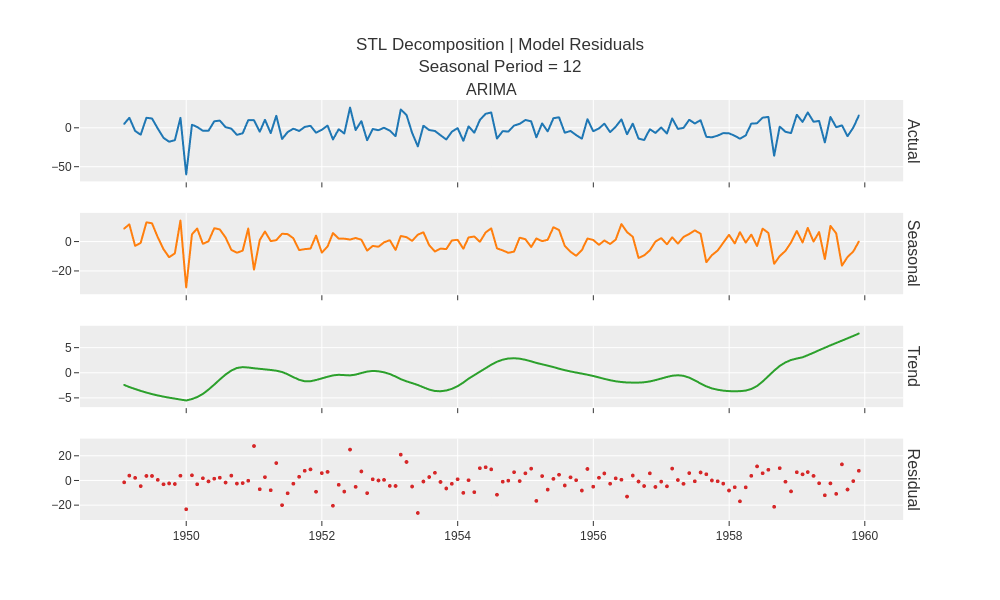

In [ ]:
exp.plot_model(model, plot="decomp")
exp.plot_model(model, plot="decomp_stl")

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.7545,0.9171,22.0339,30.0192,0.0538,0.0562,0.7067
1,1957-12,0.8044,0.8105,24.5938,27.5155,0.0646,0.0634,0.8017
2,1958-12,0.8880,1.0076,25.3731,32.7521,0.0543,0.0565,0.7600
Mean,NaT,0.8156,0.9117,24.0002,30.0956,0.0575,0.0587,0.7561
SD,NaT,0.0551,0.0805,1.4264,2.1385,0.0050,0.0034,0.0389


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,0.8837,0.9749,26.9090,33.6827,0.0531,0.0549,0.7952


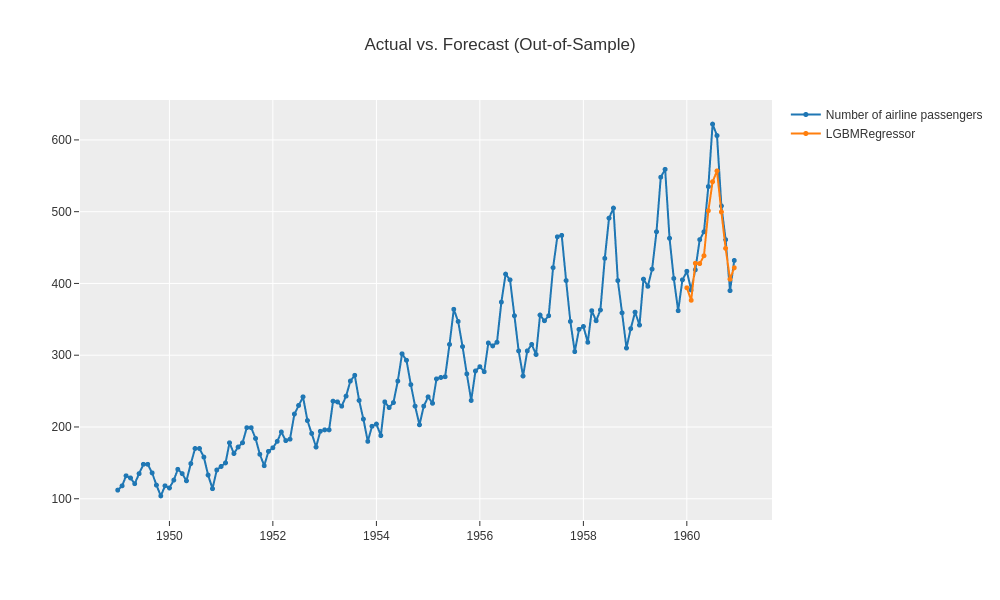

In [ ]:
model = exp.create_model("lightgbm_cds_dt")
y_predict = exp.predict_model(model)
exp.plot_model(estimator=model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3579,0.4283,10.4519,14.0196,0.0263,0.0265,0.9360
1,1957-12,1.0488,1.0486,32.0663,35.5979,0.0900,0.0852,0.6680
2,1958-12,0.4800,0.5406,13.7143,17.5717,0.0322,0.0318,0.9309
Mean,NaT,0.6289,0.6725,18.7442,22.3964,0.0495,0.0478,0.8450
SD,NaT,0.3011,0.2699,9.5138,9.4468,0.0288,0.0265,0.1252


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.4s finished


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

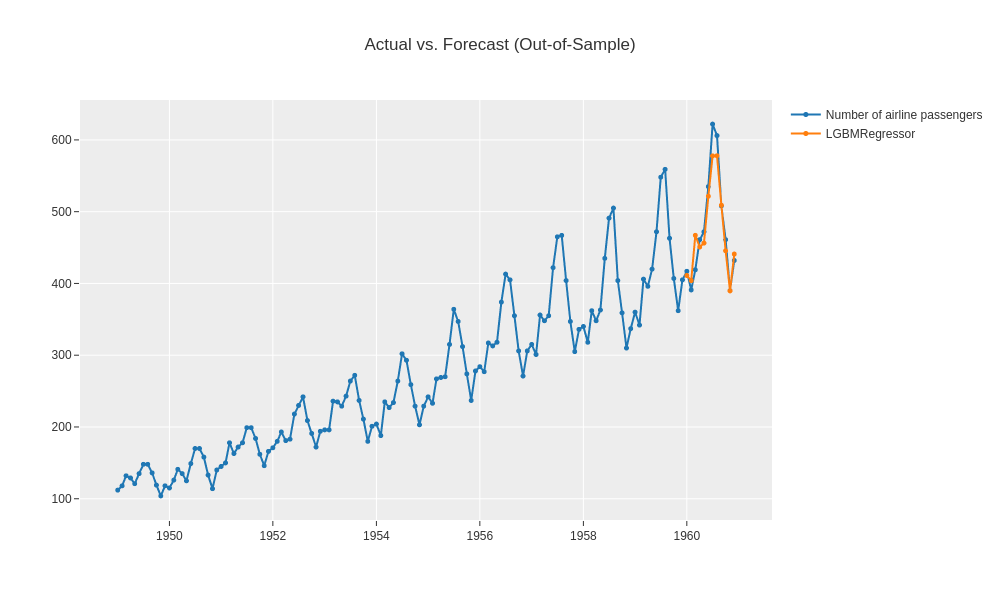

In [ ]:
tuned_model = exp.tune_model(model)
exp.plot_model(estimator=tuned_model)

In [ ]:
print(model)
print(tuned_model)

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(n_jobs=-1, random_state=42), sp=12,
                    window_length=12)
BaseCdsDtForecaster(degree=2, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

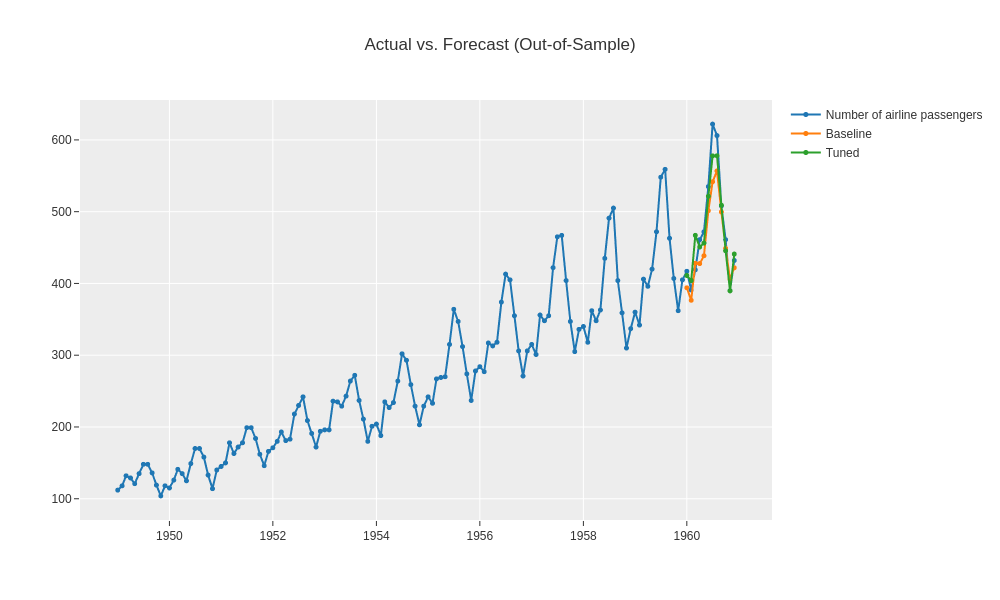

In [ ]:
exp.plot_model([model, tuned_model], data_kwargs={"labels": ["Baseline", "Tuned"]})

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

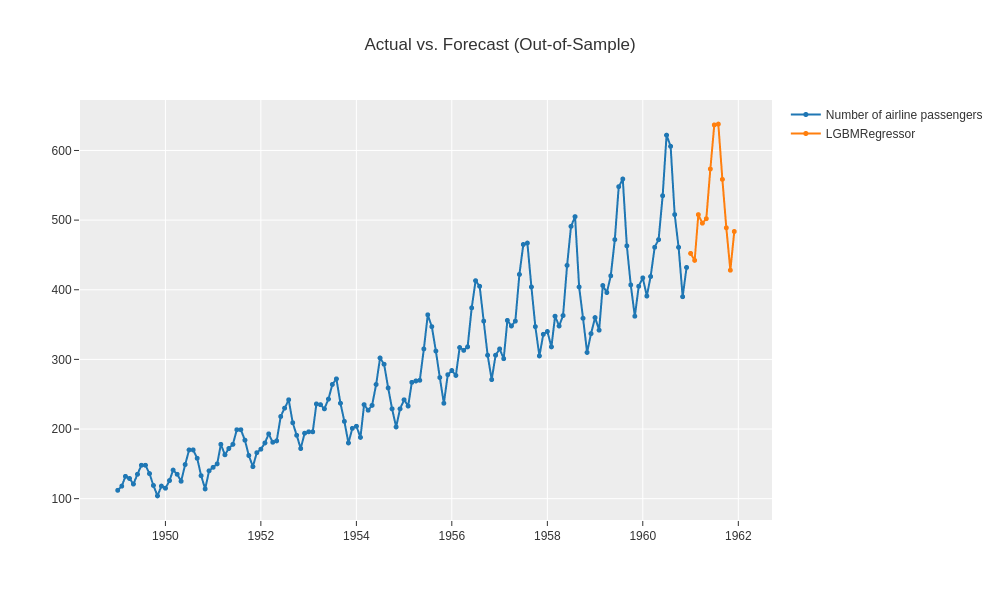

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

,y_pred
1961-01,452.1794
1961-02,442.2188
1961-03,507.8725
1961-04,495.6355
1961-05,502.0727
1961-06,573.4596
1961-07,636.7021
1961-08,637.8523
1961-09,558.5107
1961-10,488.9473


In [ ]:
final_model = exp.finalize_model(tuned_model)
exp.plot_model(final_model)
exp.predict_model(final_model)

In [ ]:
print(tuned_model)
print(final_model)

BaseCdsDtForecaster(degree=2, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(bagging_freq=5, colsample_bytree=1,
              learning_rate=0.002555136140832446, max_depth=8,
              min_child_samples=78, n_estimators=224, n_jobs=-1, num_leaves=253,
              random_state=42, reg_alpha=3.1441277090264217e-10,
              reg_lambda=3.7899513783298367e-07, subsample=1),
                    sp=12, window_length=13)
ForecastingPipeline(steps=[('forecaster',
                            Tran

In [ ]:
_ = exp.save_model(final_model, "my_final_model")

Transformation Pipeline and Model Successfully Saved


In [ ]:
exp_load = TSForecastingExperiment()
loaded_model = exp_load.load_model("my_final_model")

Transformation Pipeline and Model Successfully Loaded


In [ ]:
exp_load.predict_model(loaded_model)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

,y_pred
1961-01,452.1794
1961-02,442.2188
1961-03,507.8725
1961-04,495.6355
1961-05,502.0727
1961-06,573.4596
1961-07,636.7021
1961-08,637.8523
1961-09,558.5107
1961-10,488.9473


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

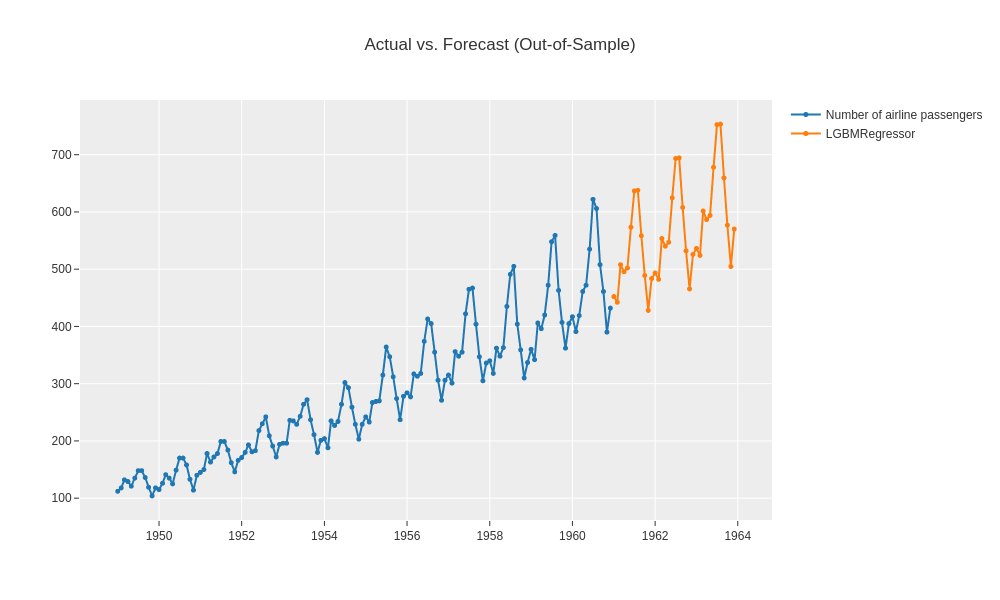

In [ ]:
exp.plot_model(estimator=final_model, data_kwargs={'fh': 36})